In [18]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

from tqdm import tqdm
from scipy.spatial import distance

from utilities_algorithms import visualize_patches, plot_patches

plt.set_cmap('gray')

<Figure size 432x288 with 0 Axes>

## Load sift data, dataset and code words

In [16]:
# load images
def load_images_from_folder(folder,color):
    images = {}
    for cdata in os.listdir(folder):
        # prevent to read something like .DS_store
        if cdata.startswith('.'):
            continue
        current_class = []
        path = folder + "/" + cdata
        for file in os.listdir(path):
            # prevent to read something like .DS_store
            if file.startswith('.'):
                continue
            image = cv2.imread(path + "/" + file)
            if color == 'gray':
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            else:
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            if image is not None:
                current_class.append(image)
        images[cdata] = current_class
    return images


# Read from directory
train_set  = load_images_from_folder('COMP338_Assignment1_Dataset/Training',color='gray')
test_set = load_images_from_folder('COMP338_Assignment1_Dataset/Test',color='gray')

<Figure size 432x288 with 0 Axes>

In [12]:
# load descriptors by class
with open('Models/SIFT_feature/train_descriptors_by_class.pkl', 'rb') as f:
    train_des_by_class  = pickle.load(f)

# load key_points by class
with open('Models/SIFT_feature/train_keypoint_by_class.pkl', 'rb') as f:
    train_kp_by_class = pickle.load(f)

# load descriptors by class for test set
with open('Models/SIFT_feature/test_descriptors_by_class.pkl', 'rb') as f:
    test_des_by_class  = pickle.load(f)

# load visual words
with open('Models/visual_words.pkl', 'rb') as f:
    words = pickle.load(f)

## Step 3: Represent images with generated code words

In [13]:
def find_index(features, center):
    count = 0
    ind = 0
    for i in range(len(center)):
        if i == 0:
            count = distance.euclidean(features, center[i])
        else:
            dist = distance.euclidean(features, center[i])
            if dist < count:
                ind = i
                count = dist
    return ind


def image_histogram(all_words, centers):
    dict_feature = {}
    for image_class, folder in all_words.items():
        category = []
        pbar = tqdm(folder, position=0)
        for image in pbar:
            pbar.set_description(f"Process {image_class} images")
            histogram = np.zeros(len(centers))
            for each_feature in image:
                ind = find_index(each_feature, centers)
                histogram[ind] += 1
            # normalize
            histogram = histogram/sum(histogram)
            category.append(histogram)
        dict_feature[image_class] = category
    return dict_feature

print(' #### Generate histogram from training descriptors and code words ####')
train_histogram = image_histogram(train_des_by_class, words)
print(' #### Generate histogram from testing descriptors and code words ####')
test_histogram = image_histogram(test_des_by_class, words)

 #### Generate histogram from training descriptors and code words ####


Process keyboard images: 100%|██████████| 70/70 [00:23<00:00,  3.04it/s]


 #### Generate histogram from testing descriptors and code words ####


Process keyboard images: 100%|██████████| 10/10 [00:03<00:00,  3.02it/s]


In [ ]:
# save histogram of training feature by class
with open('Models/histograms/train_histogram.pkl', 'wb') as f:
    pickle.dump(train_histogram, f)
# save histogram of teseting feature by class
with open('Models/histograms/test_histogram.pkl', 'wb') as f:
    pickle.dump(test_histogram, f)

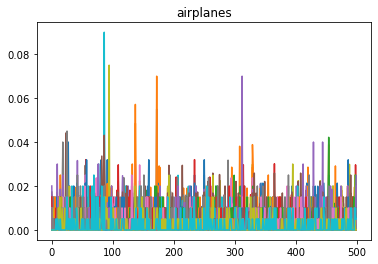

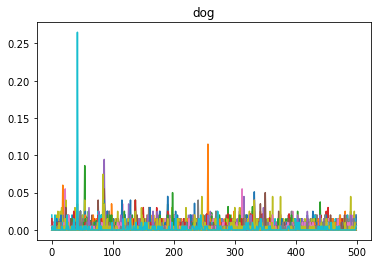

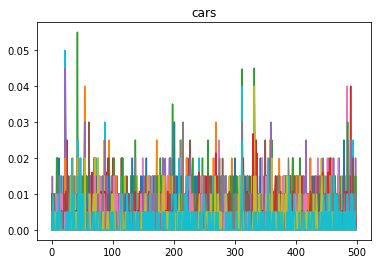

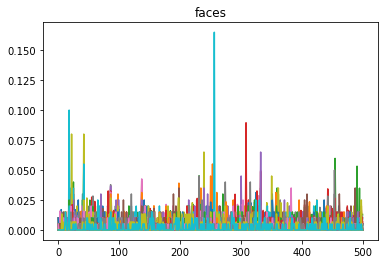

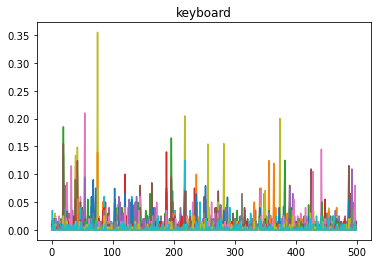

In [15]:
# Visualize the result by merging the histogram of images belonging same class
for key, value in train_histogram.items():
    plt.figure()
    plt.title(f"{key}")
    for idx, img in enumerate(value):
        plt.plot(img)

### Step 3.3 : Visualize some image patches that are assigned to the same codeword.

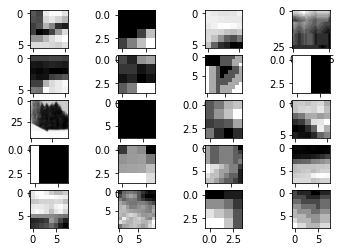

In [17]:
image_patches = visualize_patches(train_des_by_class, train_kp_by_class, words, 20, dataset=train_set)
plot_patches(image_patches)